# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [4]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

     |████████████████████████████████| 4.7 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 1.6 MB/s eta 0:00:01


Running this project require the following imports 

In [344]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from matplotlib.colors import LogNorm

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram ,linkage

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    #color = 'brgcmyk'  #List colors
    color = ['b','r','g','c','m','y','k','#00EEEE','#A9A9A9','#FF8C00','#682288'] 
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



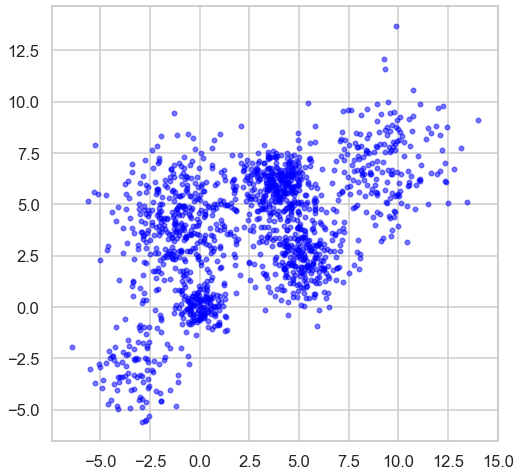

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

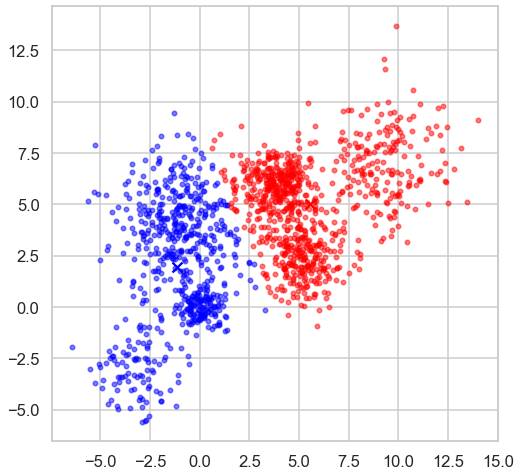

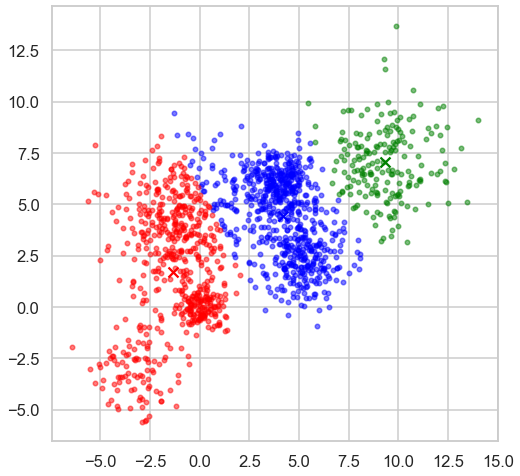

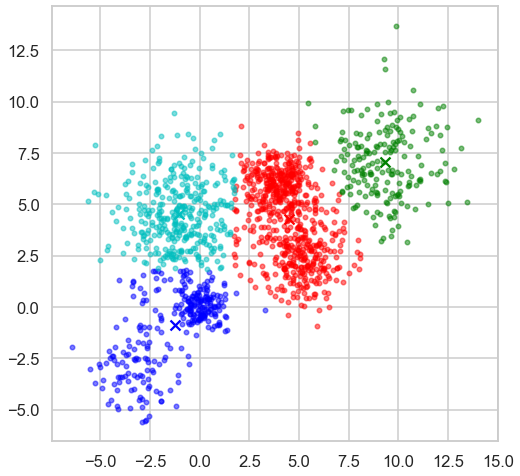

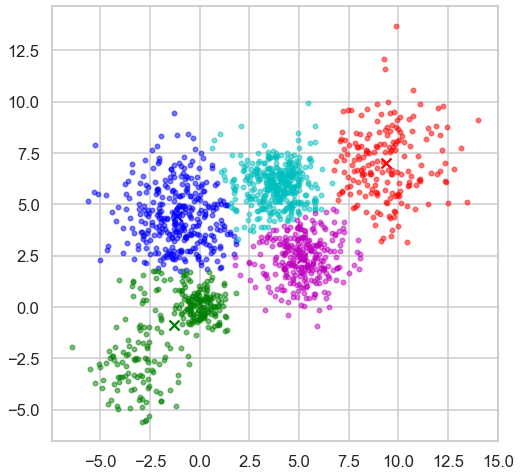

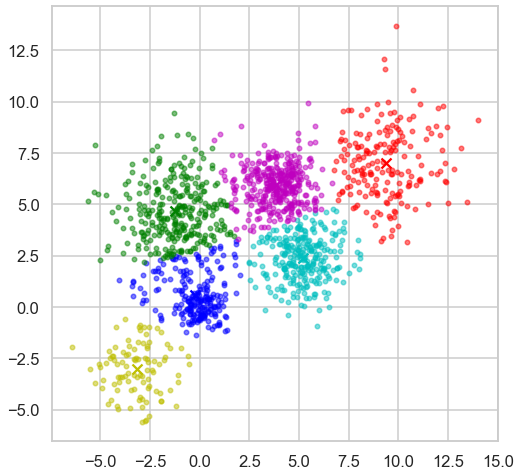

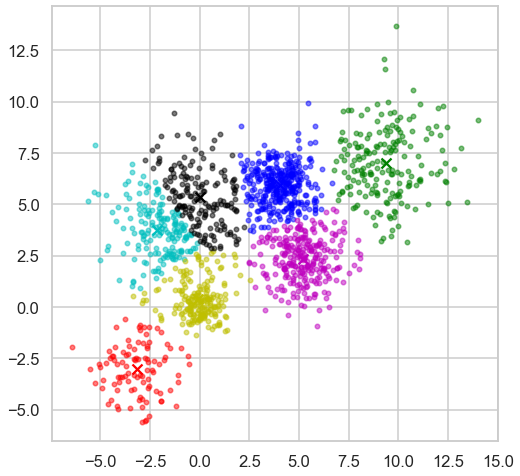

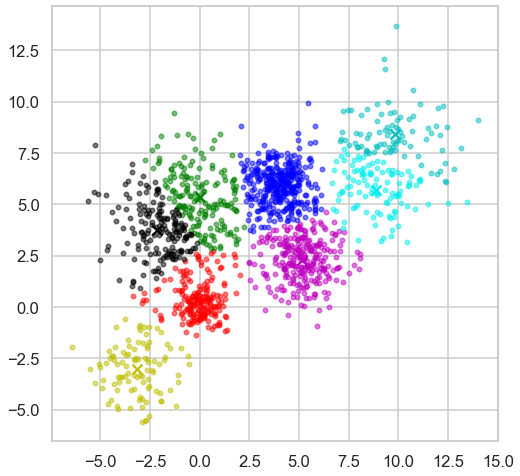

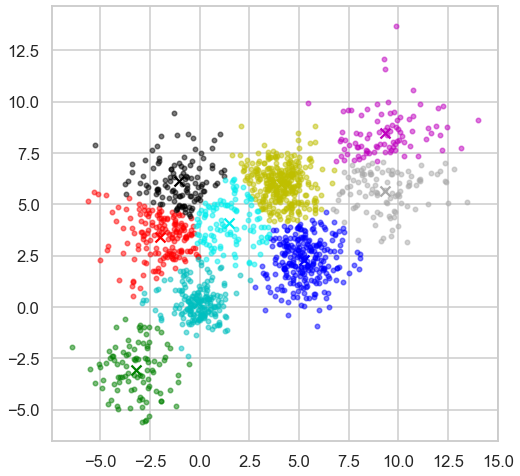

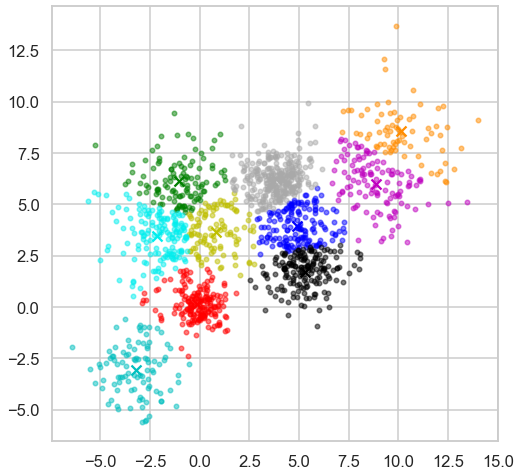

In [267]:
#Plotting the outcome for each cluster
def plot_kmeans_clusters(Data):
    k_vals=range(2,11)
    for k in k_vals:
        km=KMeans(n_clusters=k)
        x=km.fit(Data)
        plt.figure()
        display_cluster(Data,km,k)
plot_kmeans_clusters(Multi_blob_Data)

In [402]:
arr_of_all_scores_for_Multi_blob_Data=[]

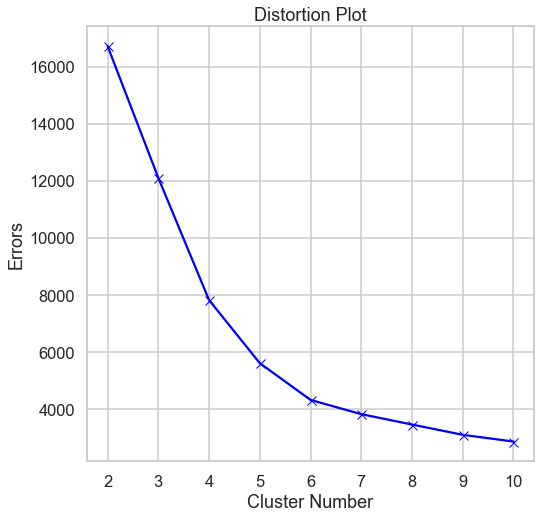

In [268]:
#Plotting the distortion function
def plot_kmeans_distortion(Data):
    sse=[]
    for k in k_vals:
        km=KMeans(n_clusters=k)
        km.fit(Data)
        sse.append(km.inertia_)
    plt.plot(k_vals,sse,'bx-')
    plt.title("Distortion Plot");
    plt.xlabel("Cluster Number");
    plt.ylabel("Errors");
plot_kmeans_distortion(Multi_blob_Data)

From the above graph we can see a good value of k is 6


In [401]:
def get_kmeans_params(Data):
    score=[]
    for k in k_vals:
        km=KMeans(n_clusters=k)
        km.fit(Data)
        score.append(silhouette_score(Data, km.labels_, metric='euclidean'))
    high_knn_score=max(score)
    k_arr=[2,3,4,5,6,7,8,9,10]
    return(high_knn_score,k_arr[score.index(high_knn_score)])

'The highest silhouette score is 0.48614459735646176 for a number of cluster 6 '

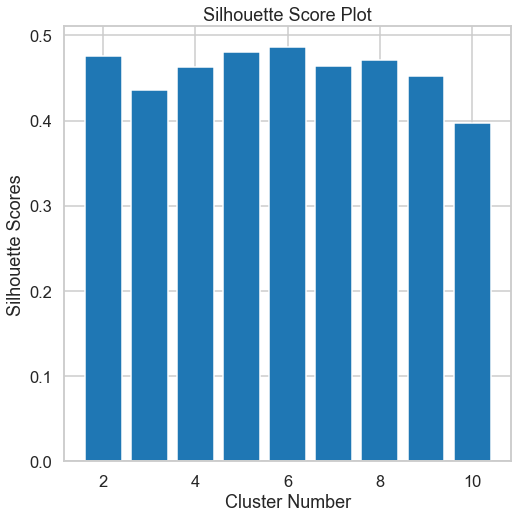

In [271]:
#Getting silhouette score
def plot_kmeans_silhouette(Data):
    score=[]
    for k in k_vals:
        km=KMeans(n_clusters=k)
        km.fit(Data)
        score.append(silhouette_score(Data, km.labels_, metric='euclidean'))
    plt.bar(k_vals,score);
    plt.title("Silhouette Score Plot");
    plt.xlabel("Cluster Number");
    plt.ylabel("Silhouette Scores");
    high_knn_score=max(score)
    k_arr=[2,3,4,5,6,7,8,9,10]
    return("The highest silhouette score is {} for a number of cluster {} ".format(high_knn_score,k_arr[score.index(high_knn_score)]))
plot_kmeans_silhouette(Multi_blob_Data)

In [428]:
high_kmeans_score , cluster_num= get_kmeans_params(Multi_blob_Data)
arr_of_all_scores_for_Multi_blob_Data.append(high_kmeans_score)
arr_of_all_scores_for_Multi_blob_Data

[0.4859737366910219]

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

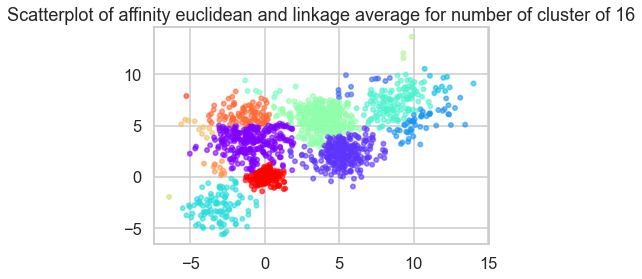

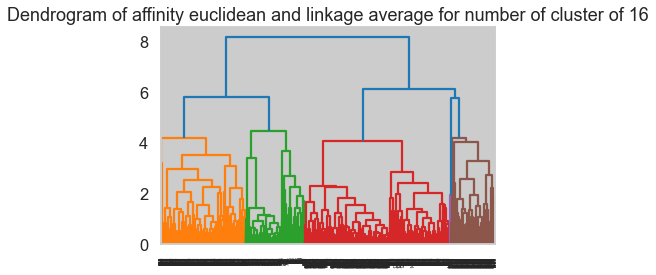

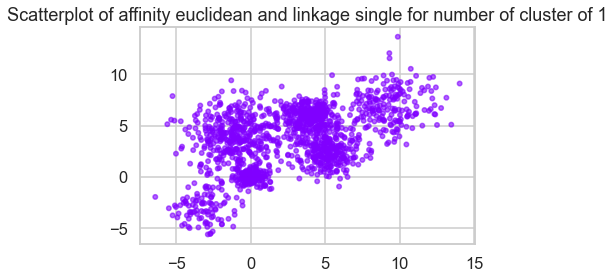

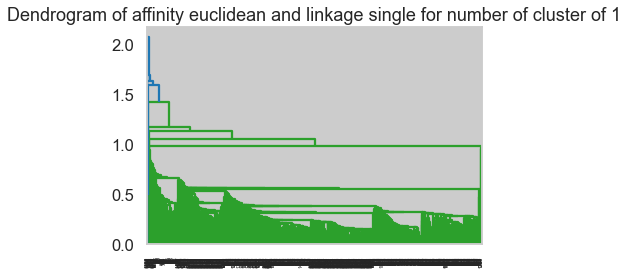

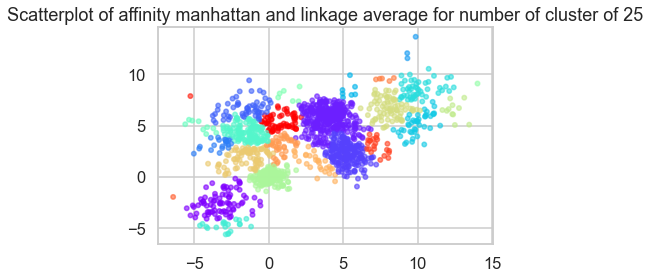

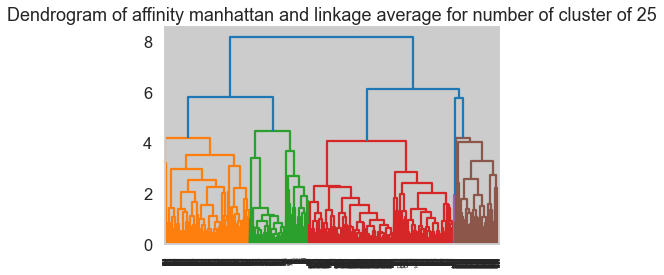

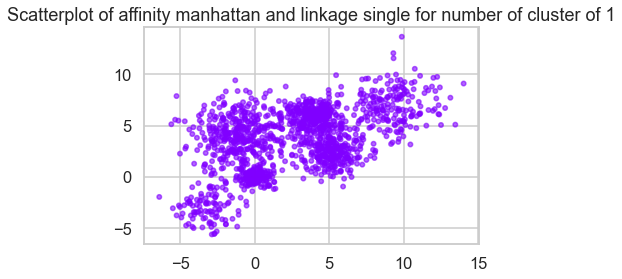

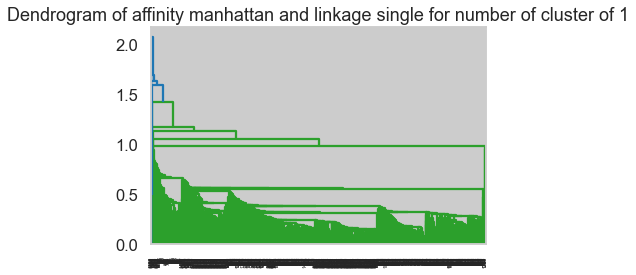

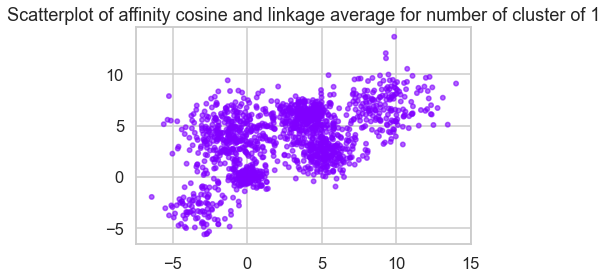

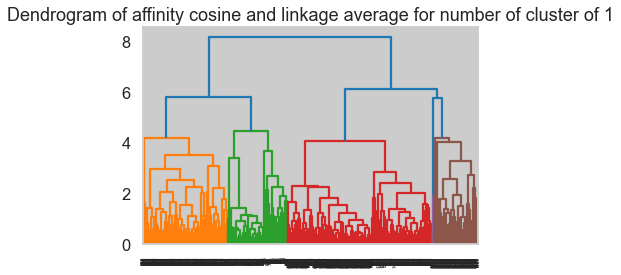

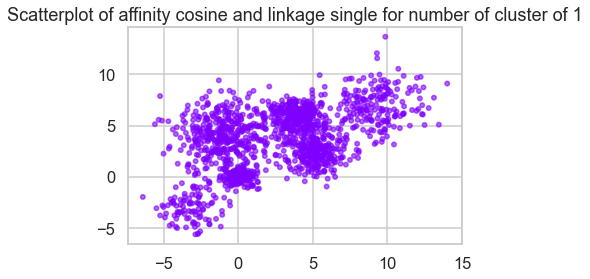

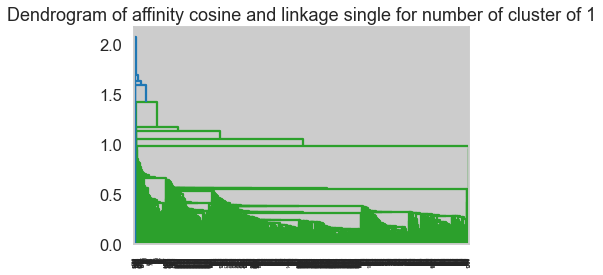

The highest silhouette score is 0.35500586075131524 for a number of cluster 16 affinity of euclidean and a linkage of average 


(0.35500586075131524, 16, 'euclidean', 'average')

In [291]:
 def plot_hierarchial_clusters_and_dendrograms(Data):
    affinity_list=['euclidean','manhattan','cosine']
    linkage_list=['average','single']
    agg_score=[]
    clusters_arr=[]
    combinations_of_hierarchial_params=[]
    for i in affinity_list:
        for j in linkage_list:
            agg_cluster=AgglomerativeClustering(n_clusters=None,affinity=i,linkage=j,distance_threshold=3)
            clusters=agg_cluster.fit(Data)
            clusters_arr.append(clusters.n_clusters_)
            plt.scatter(Data[:,0],Data[:,1],c=agg_cluster.fit_predict(Data),cmap='rainbow',alpha=0.6,s=20)
            plt.title('Scatterplot of affinity {} and linkage {} for number of cluster of {}'.format(i,j,clusters.n_clusters_))
            plt.show()
            Z=linkage(Data,j)
            dendrogram(Z)
            plt.title('Dendrogram of affinity {} and linkage {} for number of cluster of {}'.format(i,j,clusters.n_clusters_))

            plt.show()
            if clusters.n_clusters_ >1:
                agg_score.append(silhouette_score(Data,clusters.labels_,i))
                combinations_of_hierarchial_params.append([i,j])
                agg_silhouette_score=max(agg_score)
    clusters_arr=list((filter((1).__ne__, clusters_arr)))
    print("The highest silhouette score is {} for a number of cluster {} affinity of {} and a linkage of {} ".
      format(agg_silhouette_score,clusters_arr[agg_score.index(agg_silhouette_score)],
     combinations_of_hierarchial_params[agg_score.index(agg_silhouette_score)][0],
     combinations_of_hierarchial_params[agg_score.index(agg_silhouette_score)][1]))
    return agg_silhouette_score,clusters_arr[agg_score.index(agg_silhouette_score)],combinations_of_hierarchial_params[agg_score.index(agg_silhouette_score)][0],combinations_of_hierarchial_params[agg_score.index(agg_silhouette_score)][1]
plot_hierarchial_clusters_and_dendrograms(Multi_blob_Data)

In [288]:
def get_params(Data):
    affinity_list=['euclidean','manhattan','cosine']
    linkage_list=['average','single']
    agg_score=[]
    clusters_arr=[]
    combinations_of_hierarchial_params=[]
    for i in affinity_list:
        for j in linkage_list:
            agg_cluster=AgglomerativeClustering(n_clusters=None,affinity=i,linkage=j,distance_threshold=3)
            clusters=agg_cluster.fit(Data)
            clusters_arr.append(clusters.n_clusters_)
            if clusters.n_clusters_ >1:
                agg_score.append(silhouette_score(Data,clusters.labels_,i))
                combinations_of_hierarchial_params.append([i,j])
                agg_silhouette_score=max(agg_score)
    clusters_arr=list((filter((1).__ne__, clusters_arr)))
    return agg_silhouette_score,clusters_arr[agg_score.index(agg_silhouette_score)],combinations_of_hierarchial_params[agg_score.index(agg_silhouette_score)][0],combinations_of_hierarchial_params[agg_score.index(agg_silhouette_score)][1],clusters_arr,agg_score
get_params(Multi_blob_Data)

(0.35500586075131524,
 16,
 'euclidean',
 'average',
 [16, 25],
 [0.35500586075131524, 0.28940578804135453])

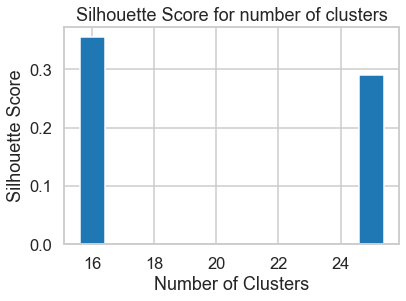

In [284]:
def plot_hierarchial_silhouette(Data):
    silh_score,k_number,aff,link,clusters_arr,agg_score=get_params(Data)
    plt.bar(clusters_arr,agg_score);
    plt.xlabel('Number of Clusters');
    plt.ylabel('Silhouette Score');
    plt.title('Silhouette Score for number of clusters');
plot_hierarchial_silhouette(Multi_blob_Data)

In [429]:
high_hierarchial_score,clusrer_num,affinity,linkage,array_x,array_y=get_params(Multi_blob_Data)
arr_of_all_scores_for_Multi_blob_Data.append(high_hierarchial_score)
arr_of_all_scores_for_Multi_blob_Data

[0.4859737366910219, 0.35500586075131524]

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

The highest silhouette score is 0.4685207355522043 for an epsilon value of 2.1 and min_samples of 6 


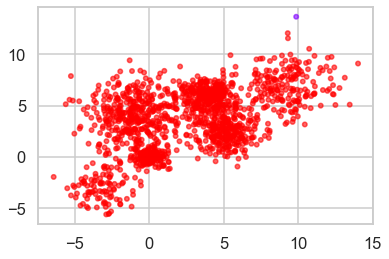

In [303]:
def plot_dbscan_clusters(Data):
    eps_list=list(np.arange(0.1,3.1,0.1))
    min_samples_list=range(5,25)
    db_score=[]
    arr_of_combinations=[]
    for i in eps_list:
        for j in min_samples_list:
            dbscan=DBSCAN(eps=i,min_samples=j)
            labels=dbscan.fit(Data)
            number_of_dbscan_clusters=len(np.unique(labels.labels_))
            #We can plot the data but we will have so many graphs so here is the general code for plotting all the data
    #         plt.scatter(Data[:,0],Data[:,1],c=dbscan.fit_predict(Data),cmap='rainbow',alpha=0.6,s=20)
    #         plt.title('Scatterplot of eps {} and min_samples {} for number of cluster of {}'.format(i,j,number_of_dbscan_clusters))
    #         plt.show()
    
            if number_of_dbscan_clusters >1:
                db_score.append(silhouette_score(Data,labels.labels_,metric='euclidean'))
                arr_of_combinations.append([i,j])
                dbscan_silhouette_score=max(db_score)
                min_sample=list(np.arange(5,26,1))
    print("The highest silhouette score is {} for an epsilon value of {} and min_samples of {} ".format(dbscan_silhouette_score,
     arr_of_combinations[db_score.index(dbscan_silhouette_score)][0],
      arr_of_combinations[db_score.index(dbscan_silhouette_score)][1]))
    #Here is the code for plotting the best parameters
    dbscan_best_params=DBSCAN(eps=arr_of_combinations[db_score.index(dbscan_silhouette_score)][0],min_samples=arr_of_combinations[db_score.index(dbscan_silhouette_score)][1])
    plt.scatter(Data[:,0],Data[:,1],c=dbscan_best_params.fit_predict(Data),cmap='rainbow',alpha=0.6,s=20)
plot_dbscan_clusters(Multi_blob_Data)

In [304]:
def get_dbscan_params(Data):
    eps_list=list(np.arange(0.1,3.1,0.1))
    min_samples_list=range(5,25)
    db_score=[]
    arr_of_combinations=[]
    for i in eps_list:
        for j in min_samples_list:
            dbscan=DBSCAN(eps=i,min_samples=j)
            labels=dbscan.fit(Data)
            number_of_dbscan_clusters=len(np.unique(labels.labels_))
            if number_of_dbscan_clusters >1:
                db_score.append(silhouette_score(Data,labels.labels_,metric='euclidean'))
                arr_of_combinations.append([i,j])
                dbscan_silhouette_score=max(db_score)
                min_sample=list(np.arange(5,26,1))
    return(dbscan_silhouette_score,arr_of_combinations[db_score.index(dbscan_silhouette_score)][0],arr_of_combinations[db_score.index(dbscan_silhouette_score)][1],db_score)
get_dbscan_params(Multi_blob_Data)

(0.4685207355522043,
 2.1,
 6,
 [-0.5423348432605972,
  -0.5008065260955386,
  -0.3999643249301035,
  -0.4180866874540623,
  -0.48893307519972995,
  -0.44633773926928655,
  -0.44848274895257567,
  -0.4342356562032568,
  -0.44713367908702734,
  -0.4406511275226322,
  -0.44353913688654695,
  -0.008351034682434994,
  -0.008351034682434994,
  -0.008351034682434994,
  -0.13789448202067064,
  -0.20223775012035436,
  -0.2902367412414653,
  -0.2657304635784329,
  -0.31998188260792054,
  -0.31050624373458935,
  -0.3279736929557754,
  -0.32638038345676135,
  -0.35712579717911924,
  -0.32290595730344823,
  -0.20583719201050144,
  -0.26008829487309465,
  -0.3346006721723167,
  -0.3799564456290586,
  -0.3902555096666418,
  -0.3770487961292272,
  -0.3786585293953615,
  -0.40865508252157867,
  -0.23119179318881292,
  -0.036215514032276665,
  -0.15311601165540278,
  -0.07958567655382505,
  -0.14973704748793595,
  -0.09279766608923844,
  -0.08959477088329026,
  -0.0011530657764766983,
  -0.091658942095

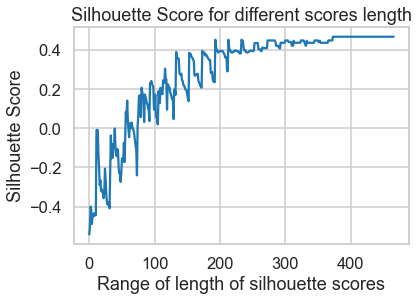

In [305]:
def plot_dbscan_silhouette(Data):
    silh_score ,eps_param ,min_sample_param ,db_score =get_dbscan_params(Data)
    plt.plot(range(0,len(db_score)),db_score);
    plt.xlabel('Range of length of silhouette scores');
    plt.ylabel('Silhouette Score');
    plt.title('Silhouette Score for different scores length');
plot_dbscan_silhouette(Multi_blob_Data)

In [430]:
high_dbscan_score,eps,minimum_samples,array_of_db = get_dbscan_params(Multi_blob_Data)
arr_of_all_scores_for_Multi_blob_Data.append(high_dbscan_score)
arr_of_all_scores_for_Multi_blob_Data

[0.4859737366910219, 0.35500586075131524, 0.4685207355522043]

In [418]:
arr_of_algorithms=['Kmeans','Hierarchial','Dbscan']

In [431]:
print("The best clustering technique used for Multi blob dataset is",arr_of_algorithms[arr_of_all_scores_for_Multi_blob_Data.index(max(arr_of_all_scores_for_Multi_blob_Data))])


The best clustering technique used for Multi blob dataset is Kmeans


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

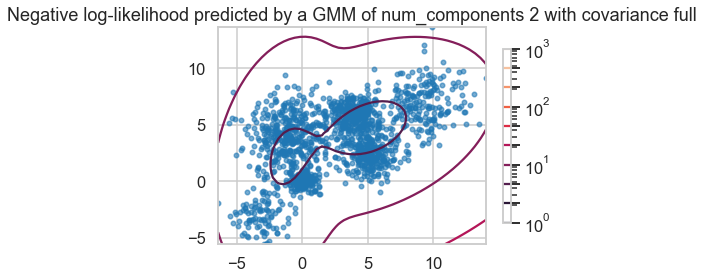

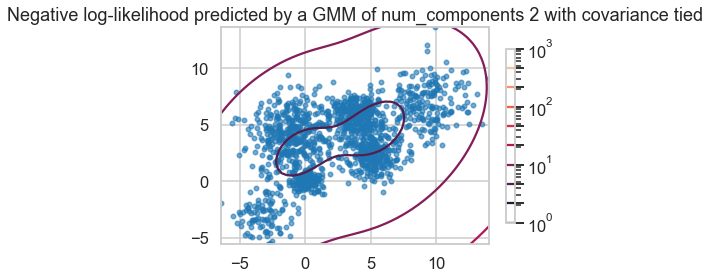

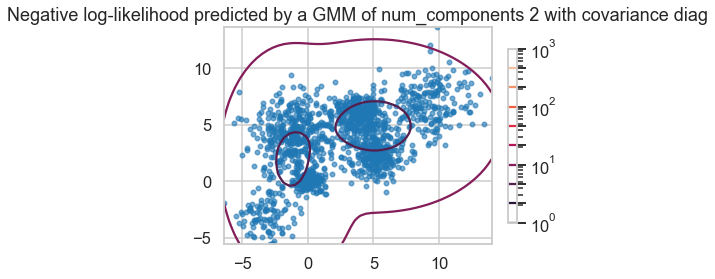

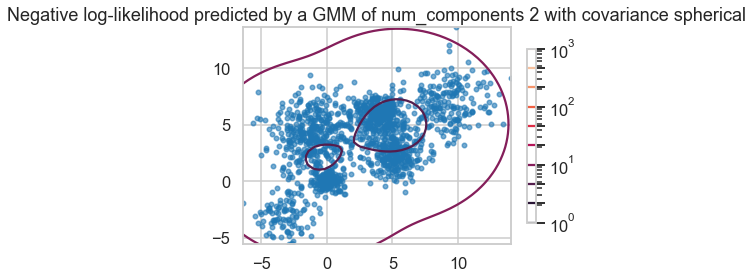

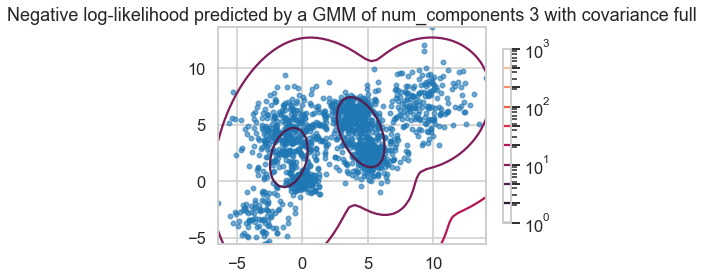

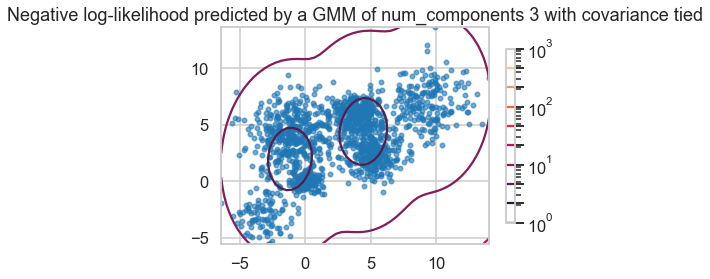

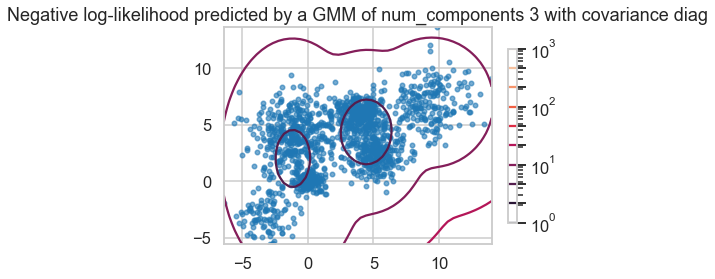

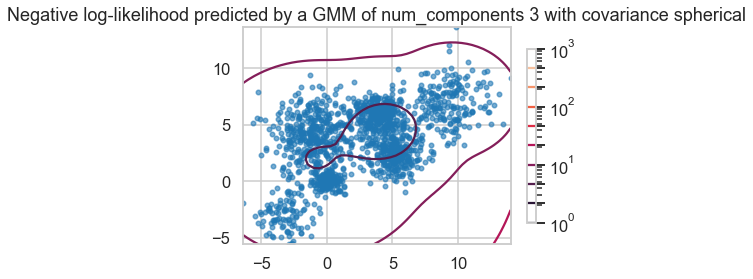

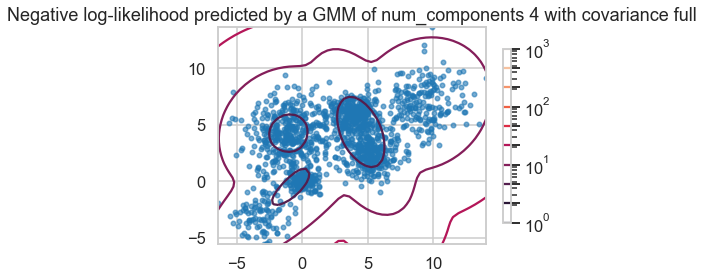

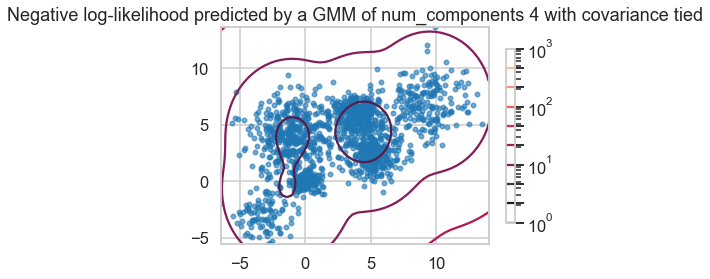

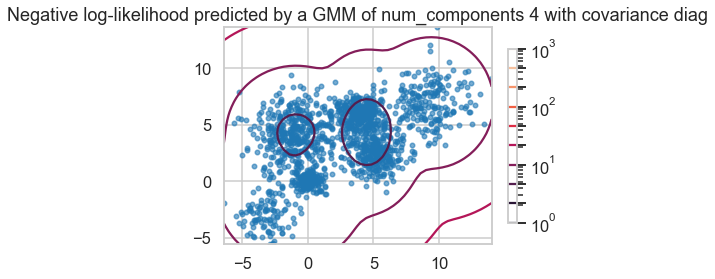

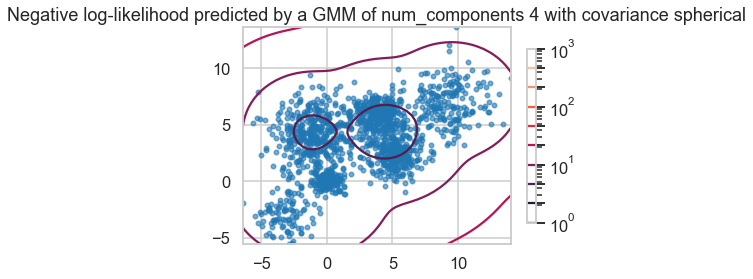

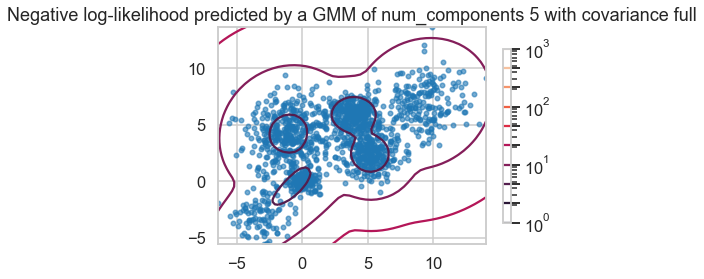

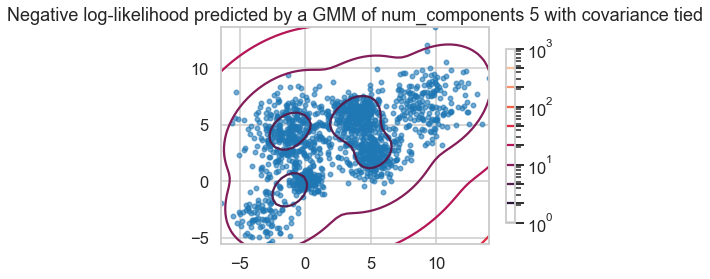

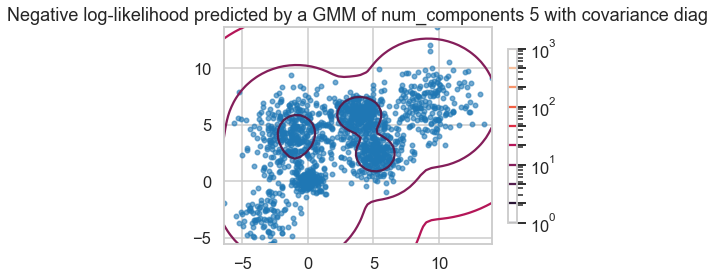

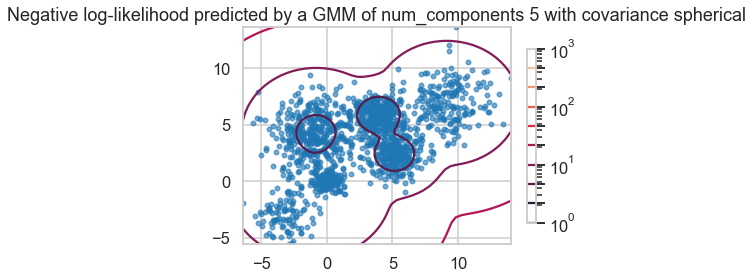

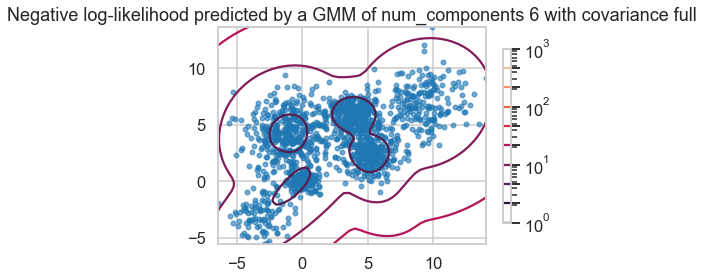

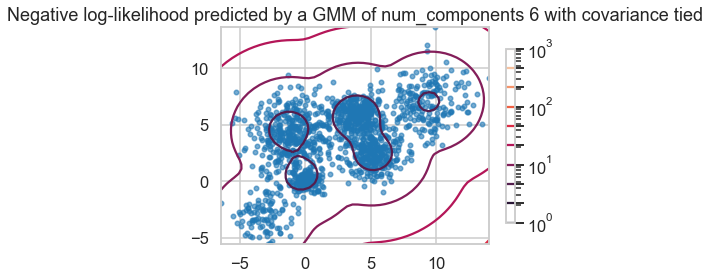

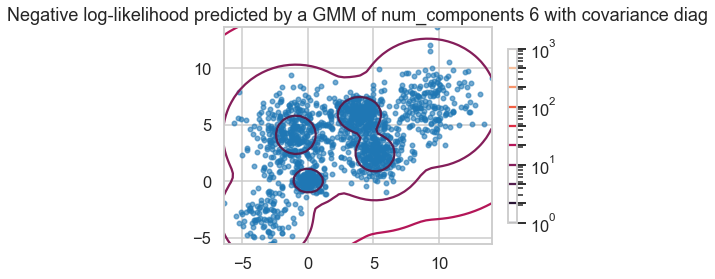

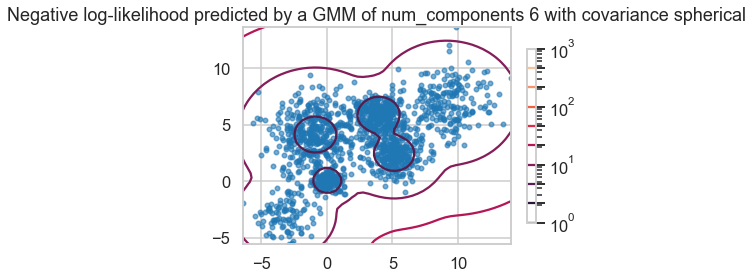

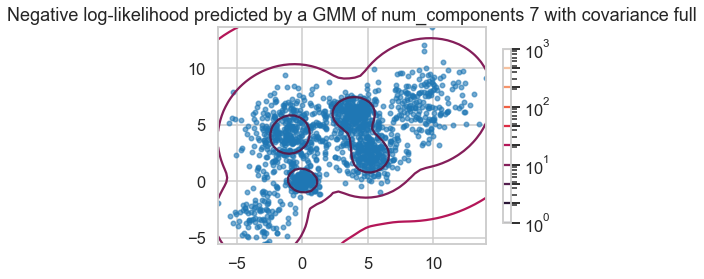

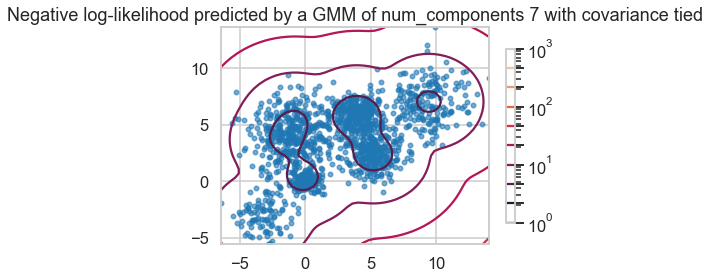

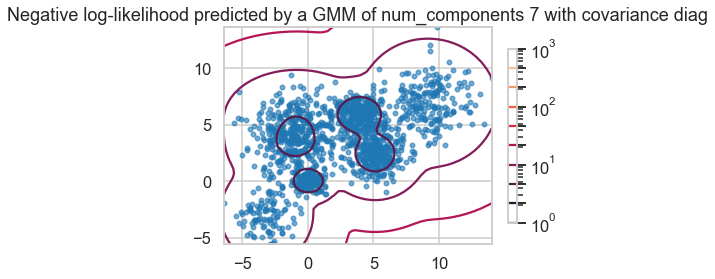

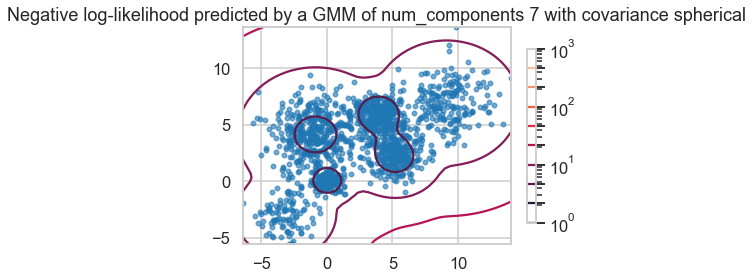

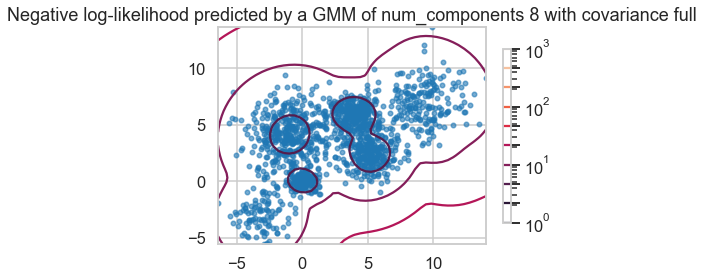

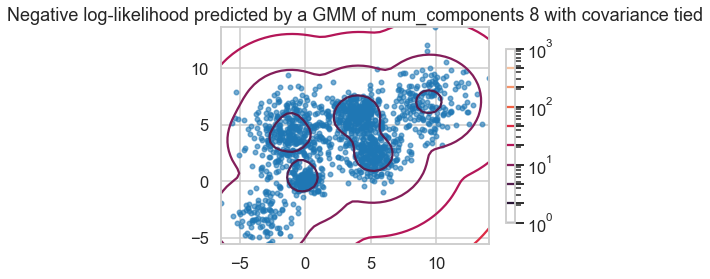

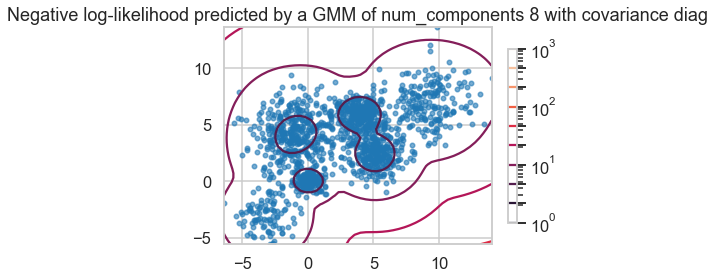

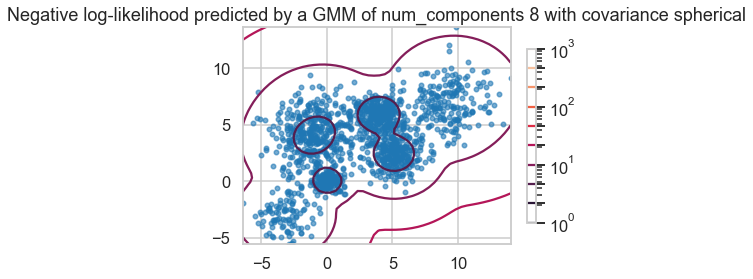

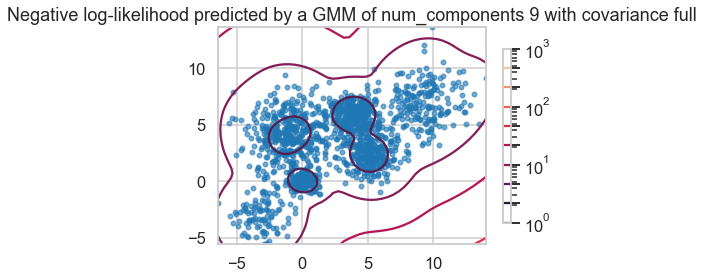

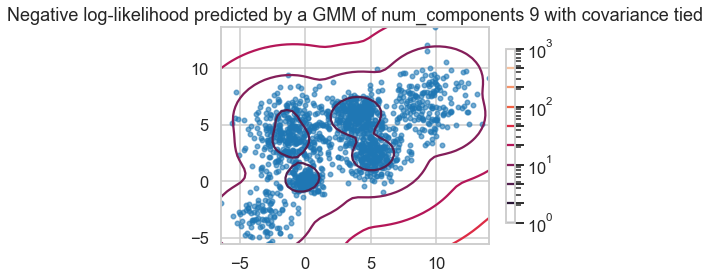

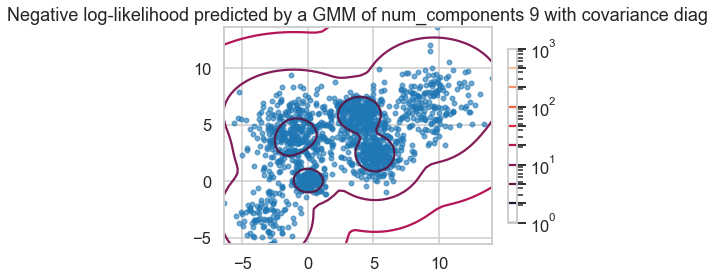

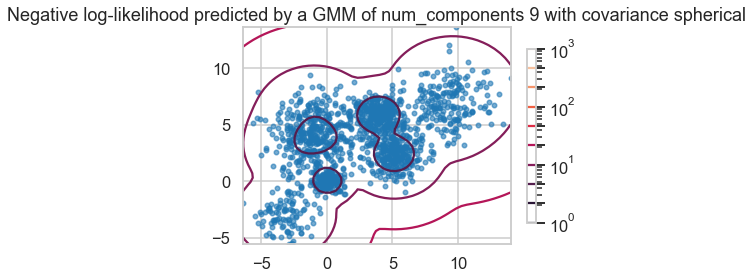

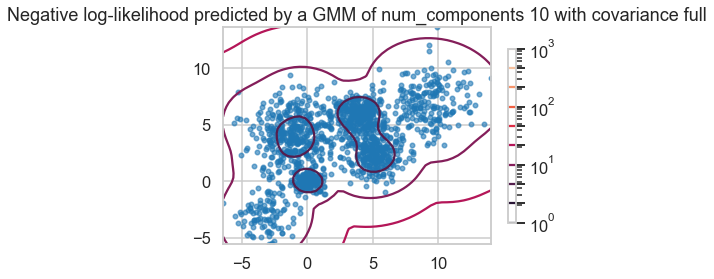

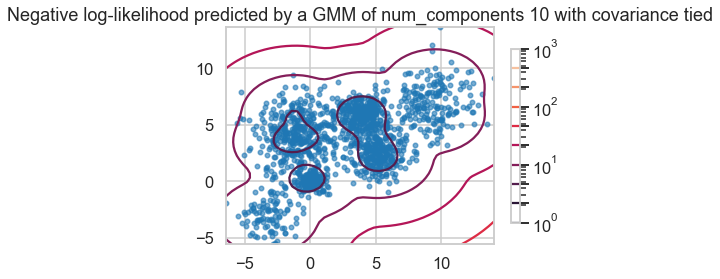

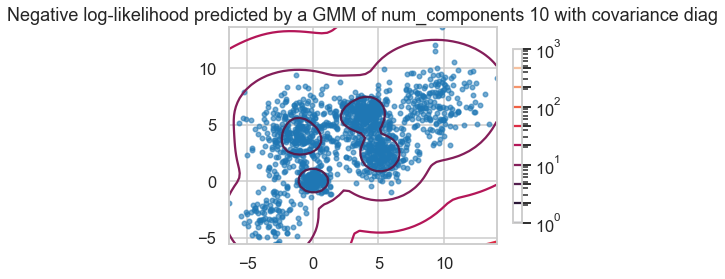

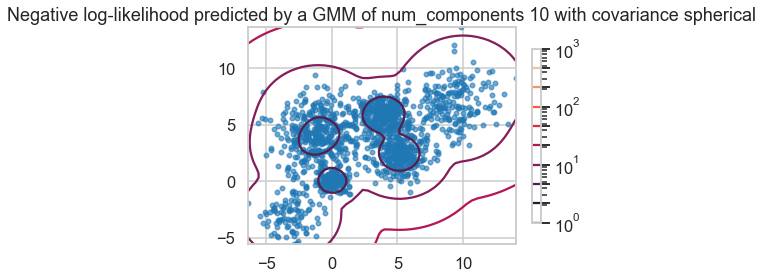

My total overall maximum is 1.0 for number_of_components 2 and covariance full


In [338]:
def plot_Gaussian_contours(Data):
    components_list=list(np.arange(2,11,1))
    cov_type_list=['full','tied','diag','spherical']
    max_of_each_component=[]
    total_max=[]
    arr_of_gaussian_combinations=[]
    for i in components_list:
        for j in cov_type_list:
            gm=GaussianMixture(n_components=i,covariance_type=j)
            labels=gm.fit(Multi_blob_Data)
            x_axis_of_data = np.linspace(min(Data[:,0]), max(Data[:,0]))
            y_axis_of_data = np.linspace(min(Data[:,1]), max(Data[:,1]))
            X, Y = np.meshgrid(x_axis_of_data, y_axis_of_data)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gm.score_samples(XX)
            Z = Z.reshape(X.shape)
            CS = plt.contour(
                X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
            )
            CB = plt.colorbar(CS, shrink=0.8, extend="both")
            plt.scatter(Data[:, 0], Data[:, 1], alpha=0.6, s=20)
            Prob_arr=gm.predict_proba(Data)
            Prob_arr=np.array(Prob_arr)
            arr_of_gaussian_combinations.append([i,j]) 
            max_of_each_component.append(np.amax(Prob_arr))
            plt.title("Negative log-likelihood predicted by a GMM of num_components {} with covariance {}".format(i,j))
            plt.axis("tight")
            plt.show()

    total_max=max(max_of_each_component)
    print("My total overall maximum is {} for number_of_components {} and covariance {}".format(total_max,
         arr_of_gaussian_combinations[max_of_each_component.index(total_max)][0],
         arr_of_gaussian_combinations[max_of_each_component.index(total_max)][1]))
plot_Gaussian_contours(Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [446]:
arr_of_all_scores_for_Iris_Data=[]

In [197]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
iris_data_without_target=pd.DataFrame(iris_data.data,columns= iris_data.feature_names)
iris_data_with_target=pd.DataFrame(iris_data.target_names[iris_data.target],columns=['target'])
Iris_df = pd.concat([iris_data_without_target,iris_data_with_target],axis=1)
Iris_df
#df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
#df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [206]:
#Encoding the target column since it contains a string 
Encodes={'setosa':1,'virginica':2,'versicolor':3}
Iris_df['target']=Iris_df['target'].replace(Encodes)
Iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
145       1  
146       1  
147       1  
148       1  
149       1  

[150 rows x 5 columns]

## KMeans for Iris Dataset

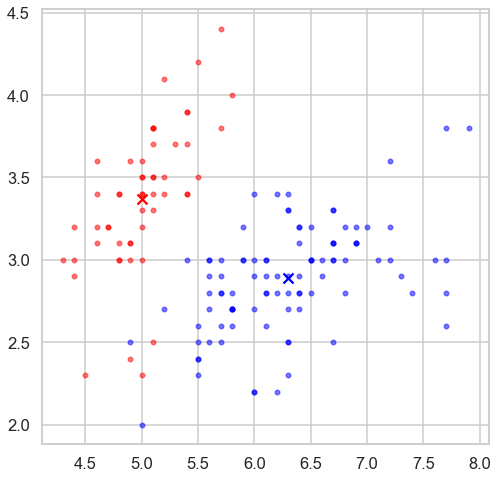

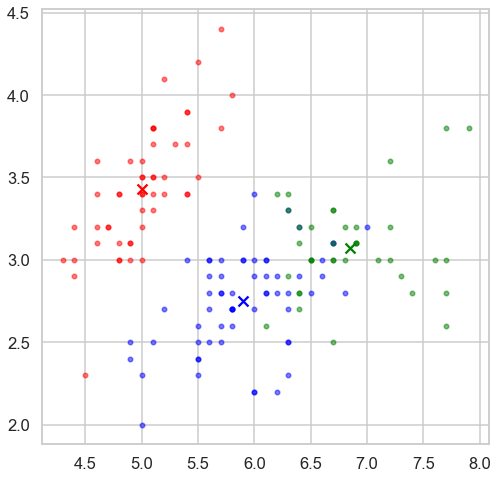

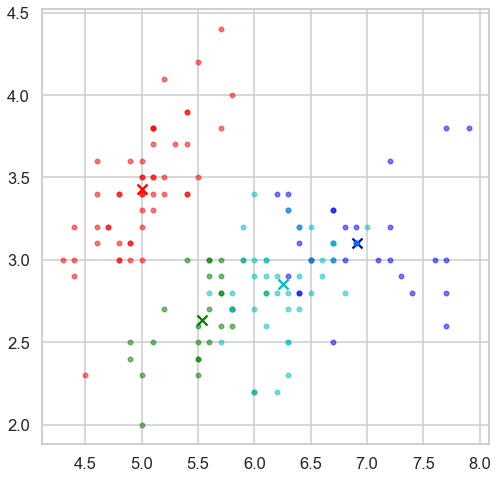

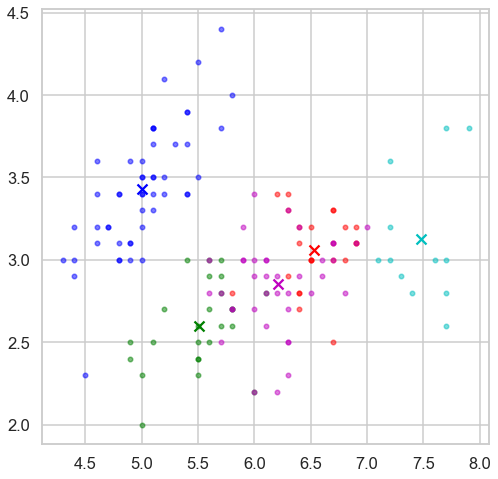

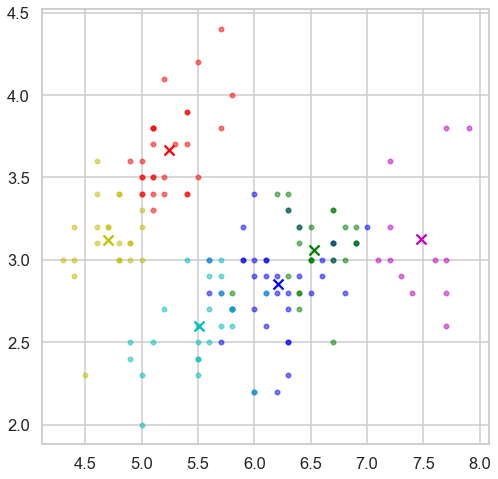

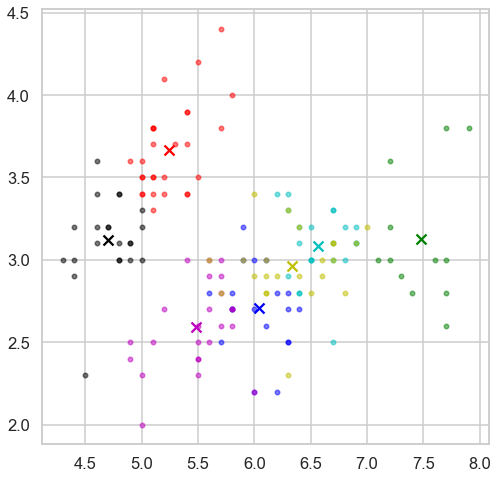

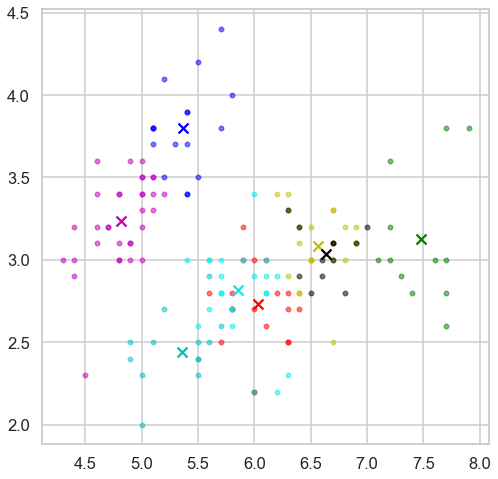

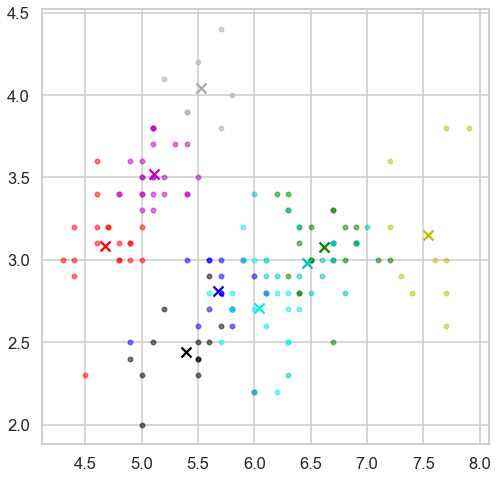

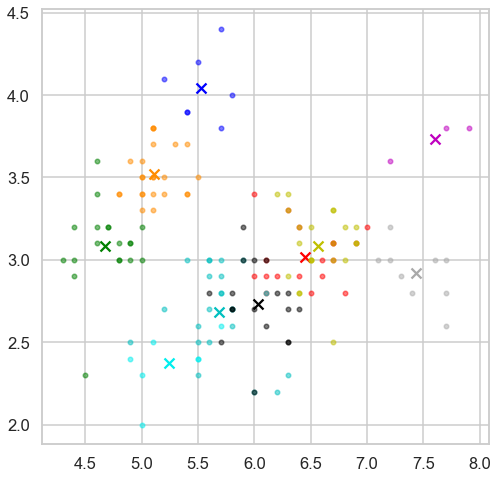

In [272]:
plot_kmeans_clusters(iris_data.data)

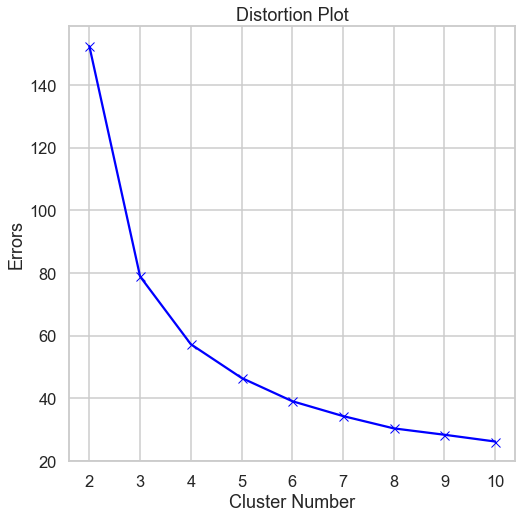

In [273]:
plot_kmeans_distortion(iris_data.data)

'The highest silhouette score is 0.681046169211746 for a number of cluster 2 '

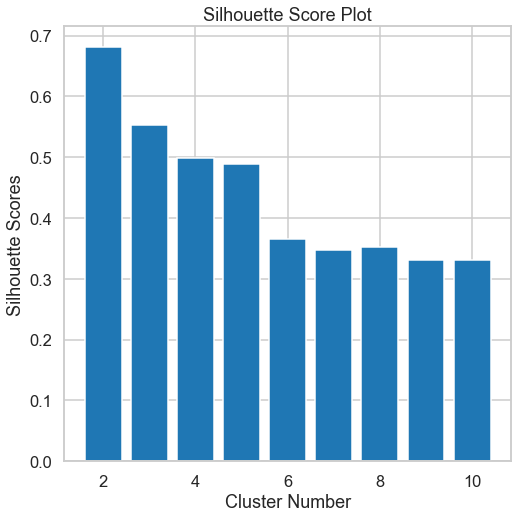

In [274]:
plot_kmeans_silhouette(iris_data.data)

Perfect number of clusters for kmeans clustering in Iris Dataset is 2

In [447]:
high_kmeans_iris_score , cluster_iris_num= get_kmeans_params(iris_data.data)
arr_of_all_scores_for_Iris_Data.append(high_kmeans_iris_score)
arr_of_all_scores_for_Iris_Data

[0.681046169211746]

## Hierarchial Clustering for Iris Dataset

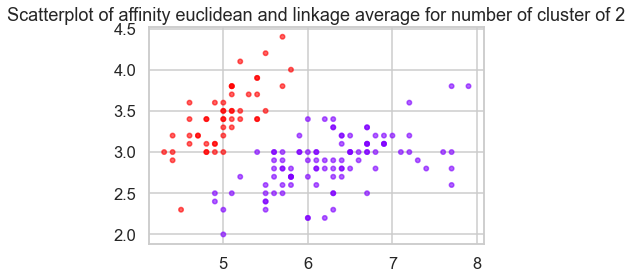

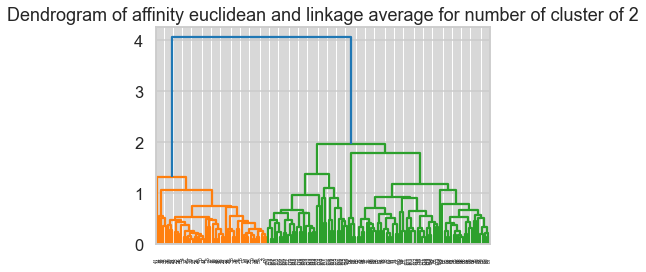

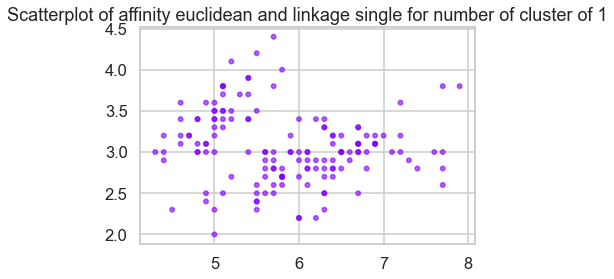

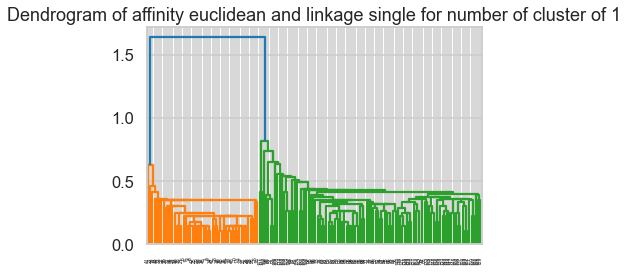

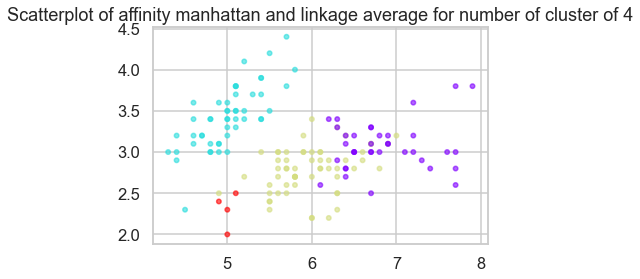

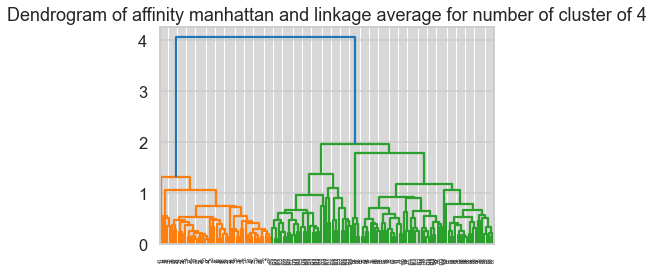

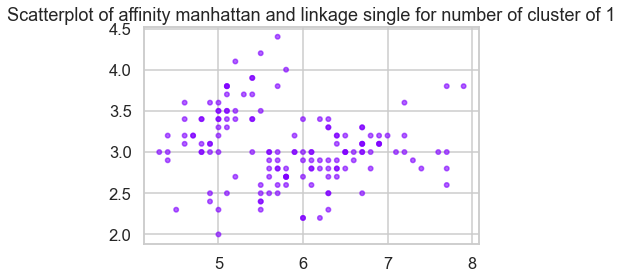

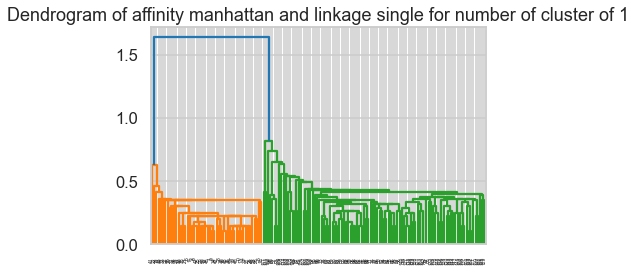

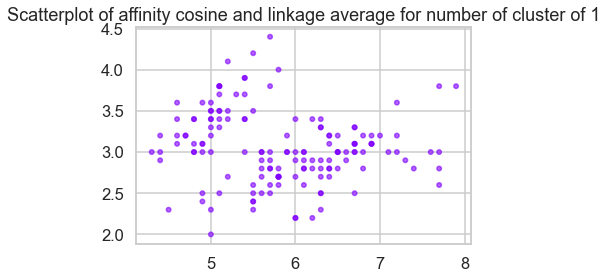

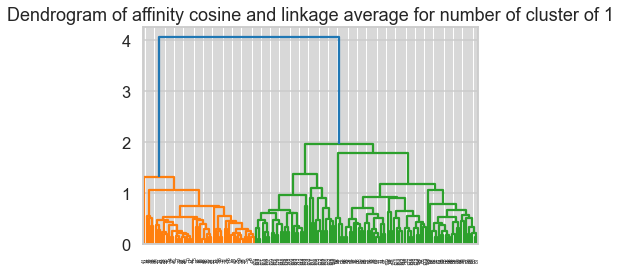

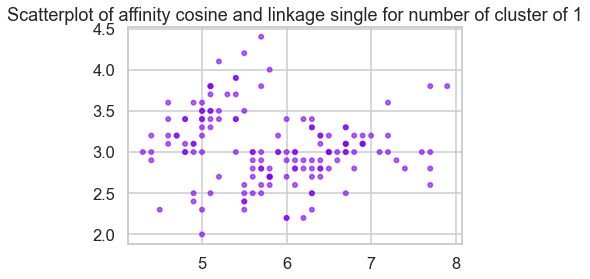

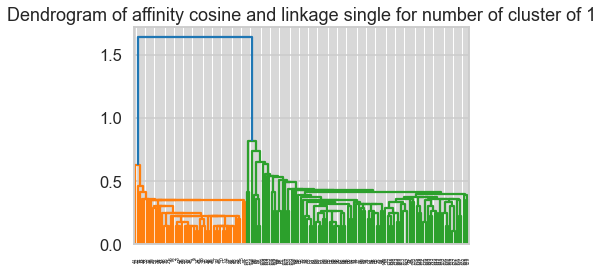

The highest silhouette score is 0.6867350732769776 for a number of cluster 2 affinity of euclidean and a linkage of average 


(0.6867350732769776, 2, 'euclidean', 'average')

In [292]:
plot_hierarchial_clusters_and_dendrograms(iris_data.data)

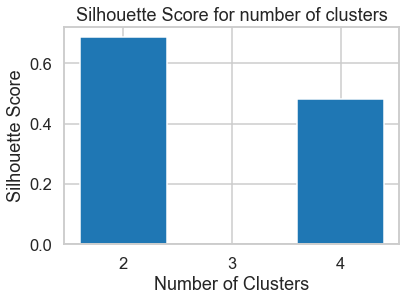

In [293]:
plot_hierarchial_silhouette(iris_data.data)

In [448]:
high_hierarchial_iris_score,eps_hierarchial,minimum_samples_hierarchial,array_of_hierarchial,l_iris,m_iris = get_params(iris_data.data)
arr_of_all_scores_for_Iris_Data.append(high_hierarchial_iris_score)
arr_of_all_scores_for_Iris_Data

[0.681046169211746, 0.6867350732769776]

## DBscan for Iris Dataset

The highest silhouette score is 0.6867350732769776 for an epsilon value of 0.9 and min_samples of 5 


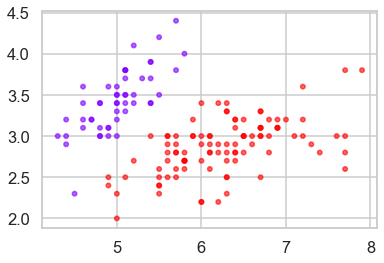

In [323]:
plot_dbscan_clusters(iris_data.data)

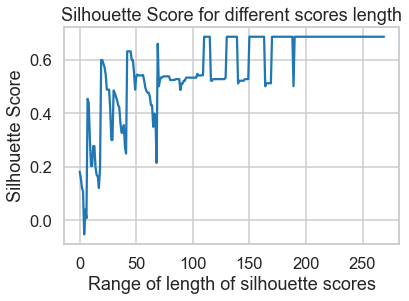

In [324]:
plot_dbscan_silhouette(iris_data.data)

In [450]:
high_dbscan_iris_score,eps_iris,minimum_samples_iris,array_of_db_iris= get_dbscan_params(iris_data.data)
arr_of_all_scores_for_Iris_Data.append(high_dbscan_iris_score)
arr_of_all_scores_for_Iris_Data

[0.681046169211746, 0.6867350732769776, 0.6867350732769776]

In [455]:
print("The best clustering technique used for iris dataset is {} or {}".format(arr_of_algorithms[arr_of_all_scores_for_Iris_Data.index(max(arr_of_all_scores_for_Iris_Data))],'Dbscan'))
#Since we have 2 maximum values 

The best clustering technique used for iris dataset is Hierarchial or Dbscan


## Gaussian for Iris Dataset

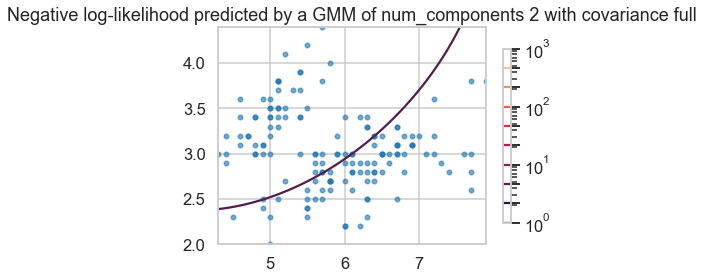

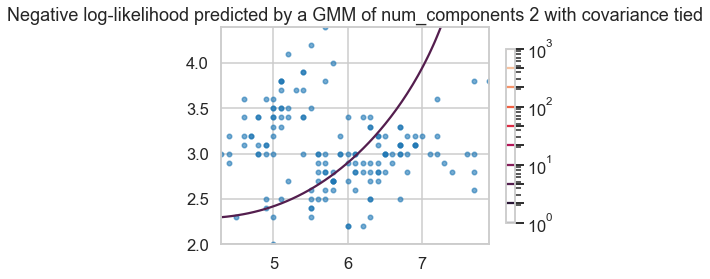

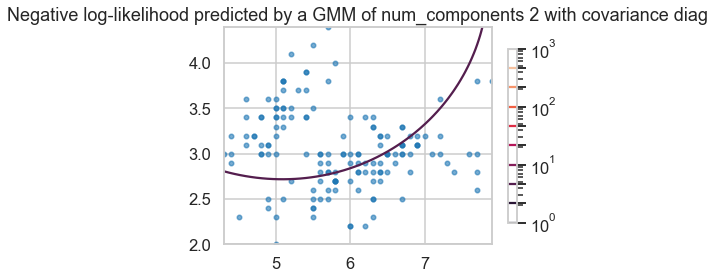

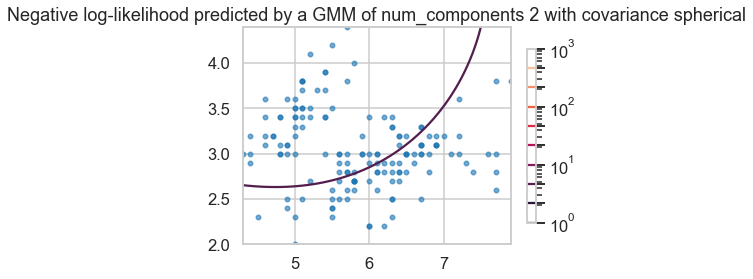

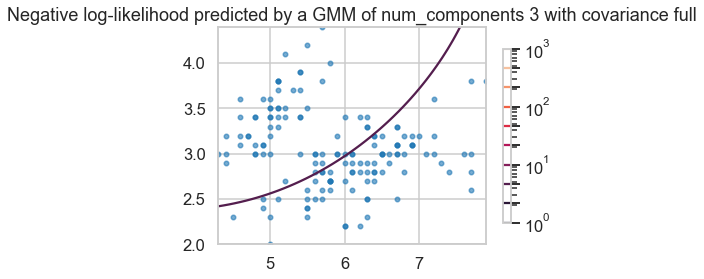

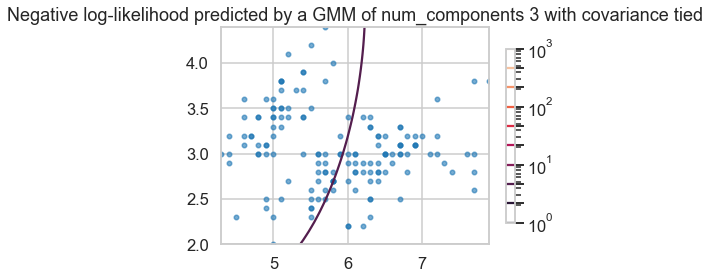

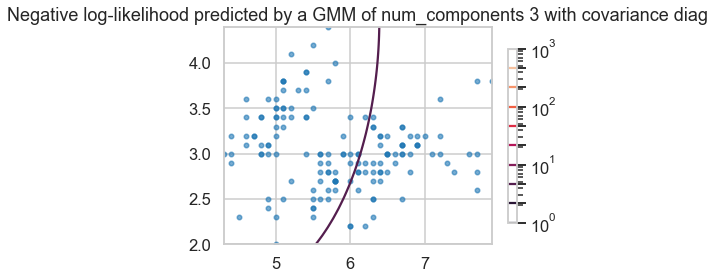

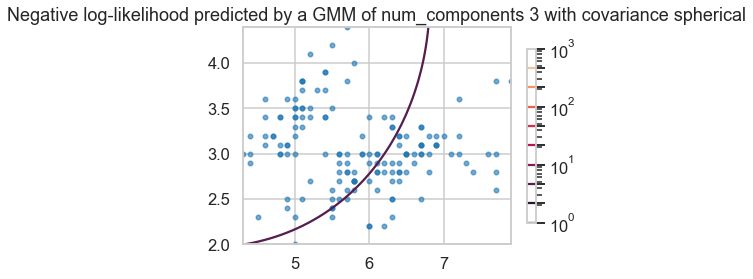

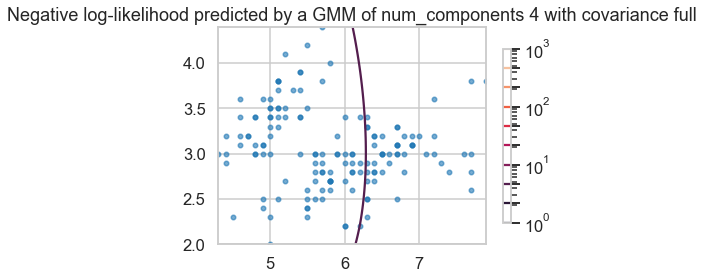

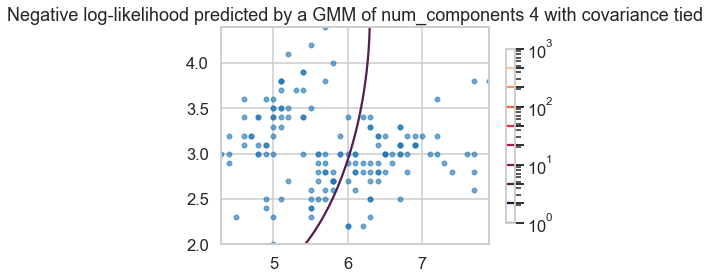

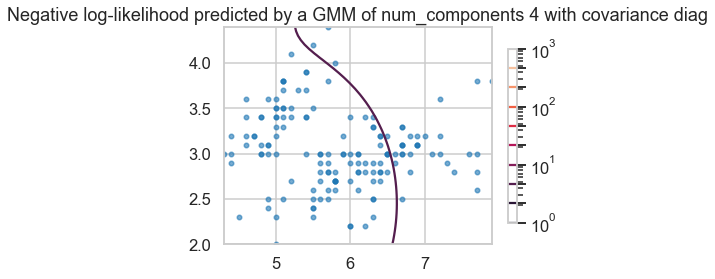

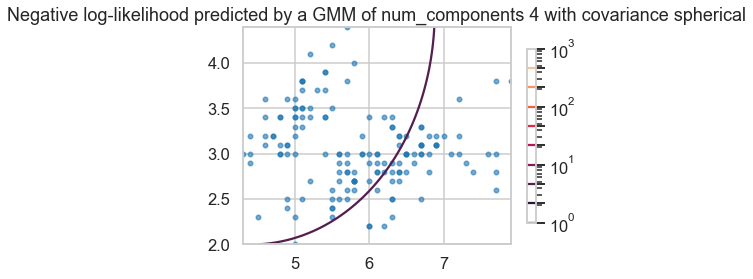

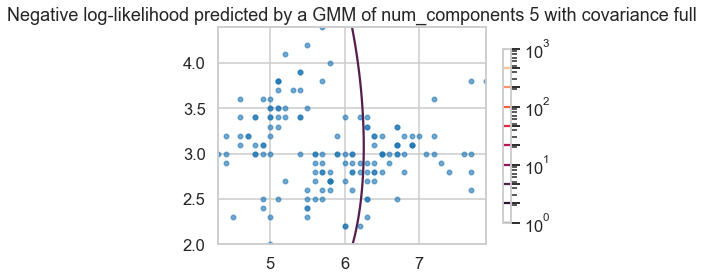

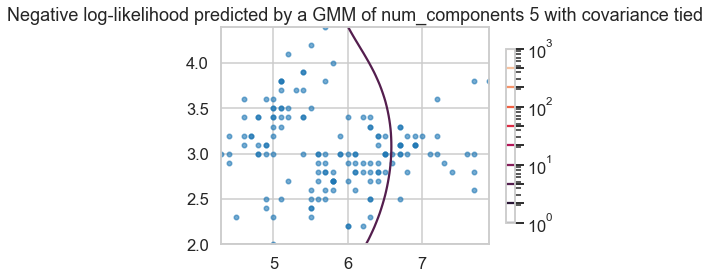

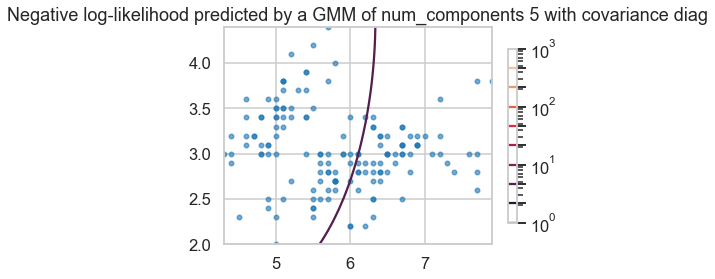

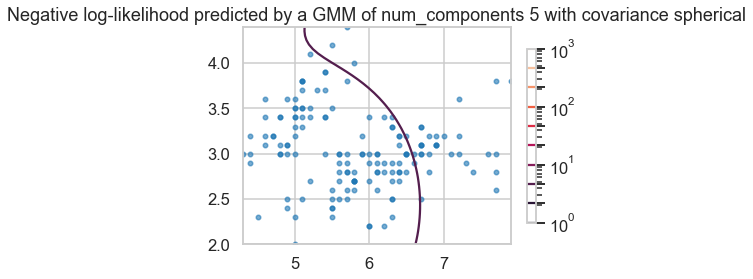

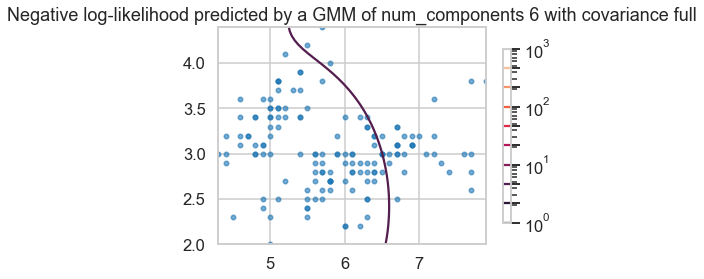

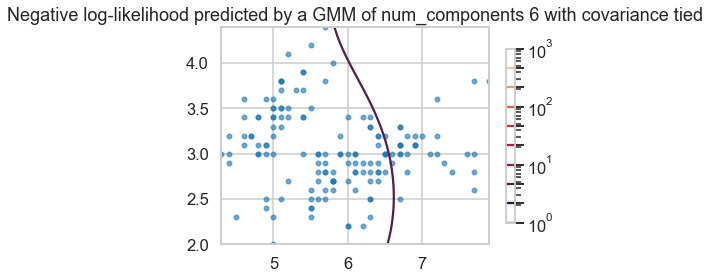

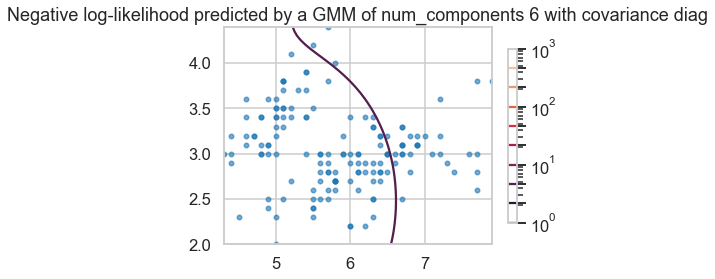

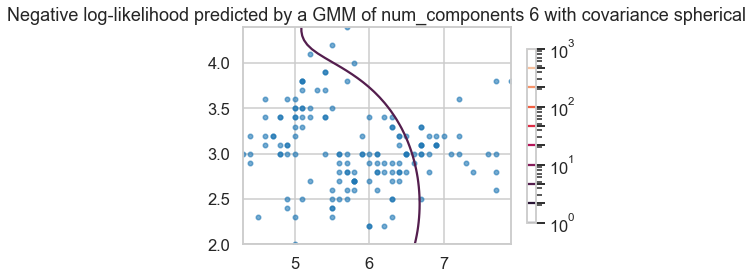

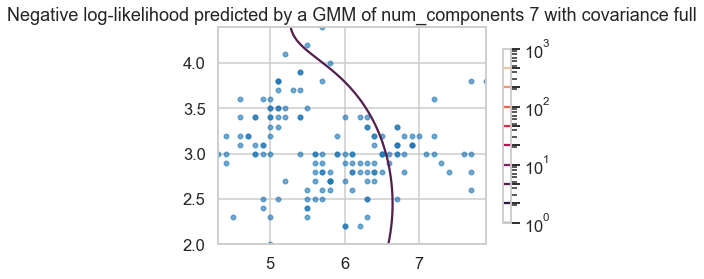

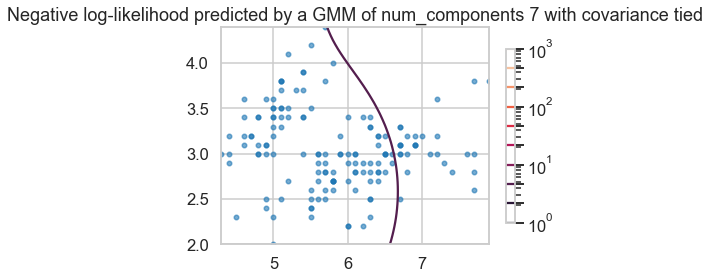

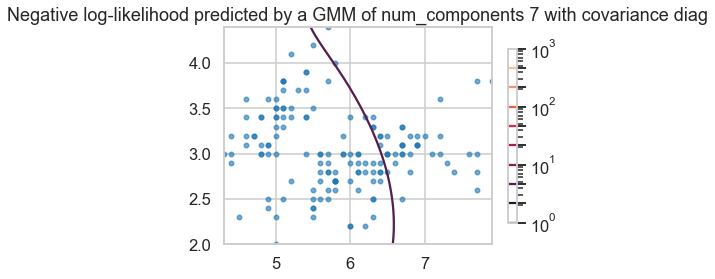

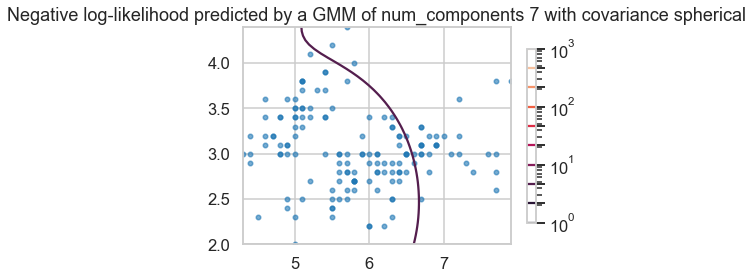

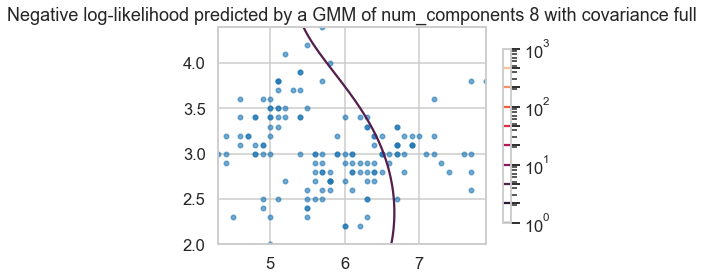

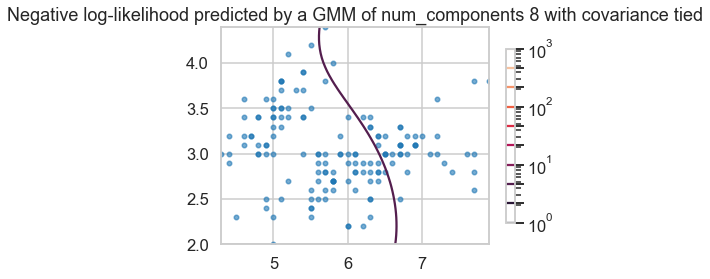

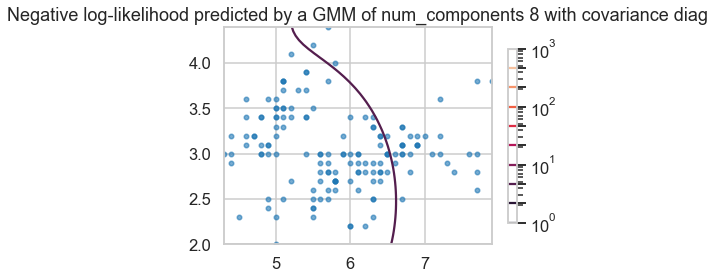

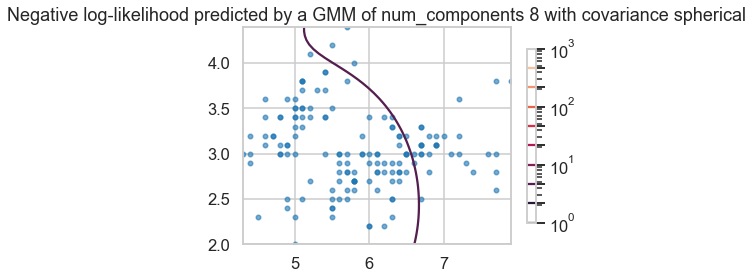

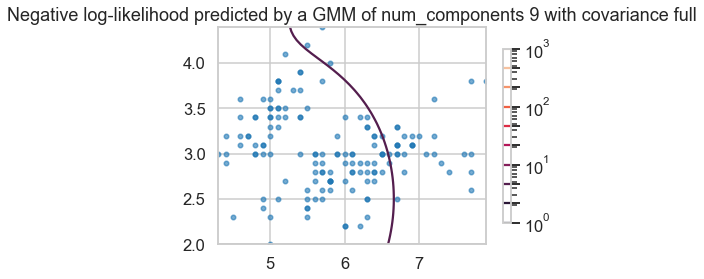

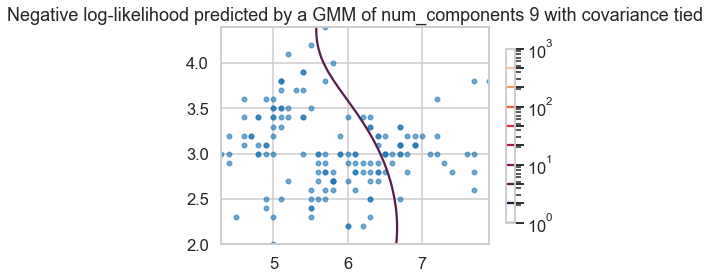

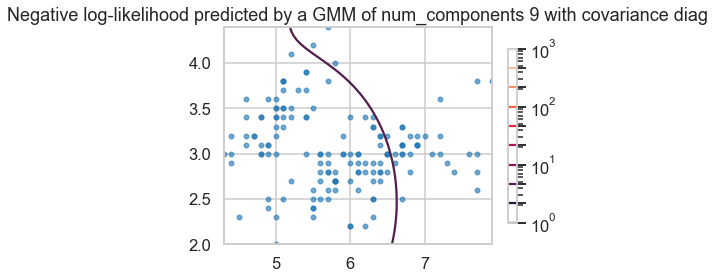

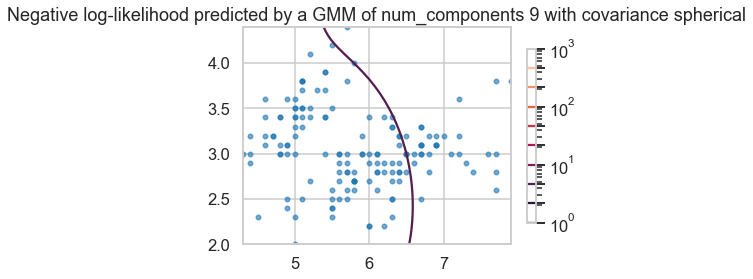

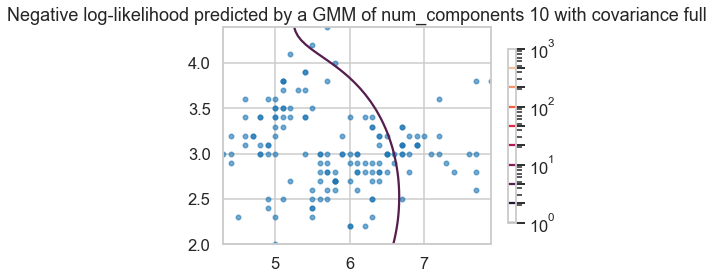

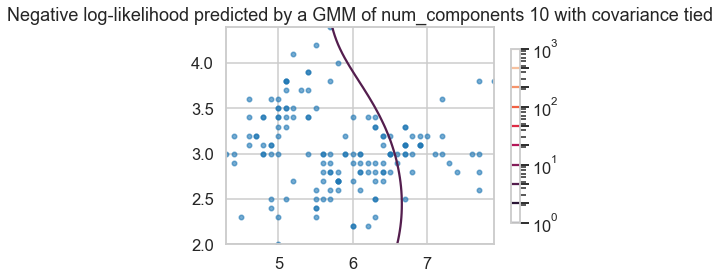

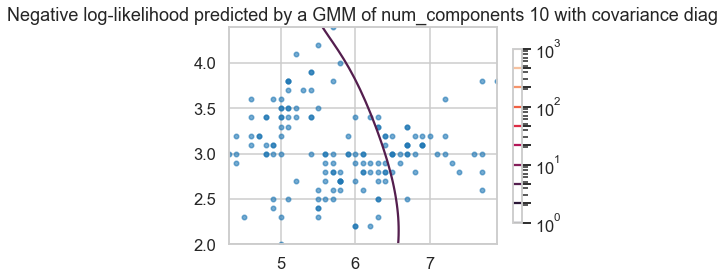

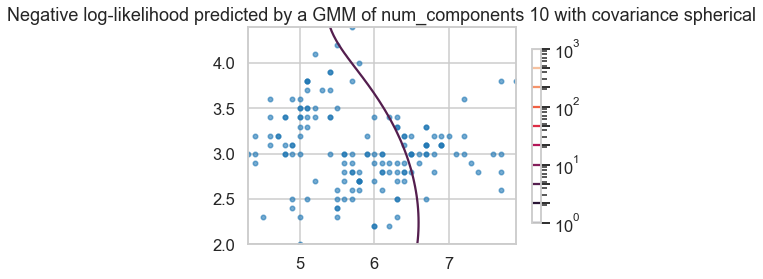

My total overall maximum is 0.9999998825219005 for number_of_components 2 and covariance diag


In [339]:
#Assume we will work on 2 features only for this dataset since it won't work with 4 features
plot_Gaussian_contours(iris_data.data[:,0:2])

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [341]:
customer_dataset=pd.read_csv('Customer data.csv')
customer_dataset.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [343]:
#Since the ID will not be important in this dataset so let us drop it 
customer_dataset.drop('ID',axis=1,inplace=True)
customer_dataset

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]

In [359]:
scaler = StandardScaler()
customer_dataset_scaled=pd.DataFrame(scaler.fit_transform(customer_dataset),columns=['Sex','Marital status','Age','Education','Income','Occupation','Settlement size'])
customer_dataset_scaled

Sex  Marital status       Age  Education    Income  Occupation  \
0    -0.917399       -0.993024  2.653614   1.604323  0.097524    0.296823   
1     1.090038        1.007025 -1.187132  -0.063372  0.782654    0.296823   
2    -0.917399       -0.993024  1.117316  -0.063372 -0.833202   -1.269525   
3    -0.917399       -0.993024  0.775916  -0.063372  1.328386    0.296823   
4    -0.917399       -0.993024  1.458716  -0.063372  0.736932    0.296823   
...        ...             ...       ...        ...       ...         ...   
1995  1.090038       -0.993024  0.946616  -0.063372  0.067471   -1.269525   
1996  1.090038        1.007025 -0.760382  -0.063372 -0.084265    0.296823   
1997 -0.917399       -0.993024 -0.418983  -1.731068 -0.906957   -1.269525   
1998  1.090038        1.007025 -1.016432  -0.063372 -0.603329   -1.269525   
1999 -0.917399       -0.993024 -0.931082  -1.731068 -1.378987   -1.269525   

      Settlement size  
0            1.552326  
1            1.552326  
2           -0.909730  
3            0.321298  
4            0.321298  
...               ...  
1995        -0.909730  
1996        -0.909730  
1997        -0.909730  
1998        -0.909730  
1999        -0.909730  

[2000 rows x 7 columns]

## Kmeans for Customer Dataset

In [362]:
plot_kmeans_clusters(customer_dataset_scaled.values)

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

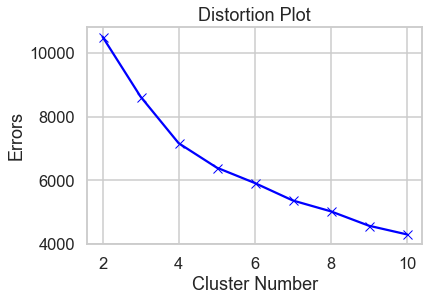

In [363]:
plot_kmeans_distortion(customer_dataset_scaled.values)

'The highest silhouette score is 0.3128706510687961 for a number of cluster 10 '

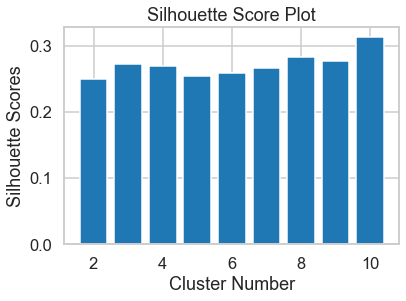

In [364]:
plot_kmeans_silhouette(customer_dataset_scaled.values)

[0.30249043643927687, 0.31444531917967344]

## Hierarchial clustering for Customer Dataset

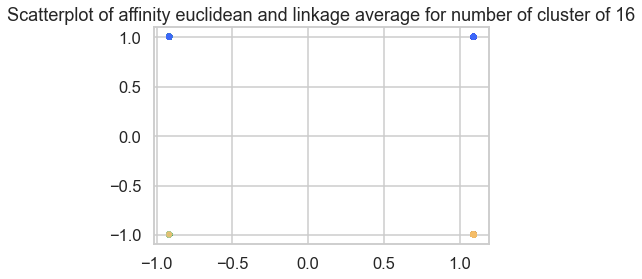

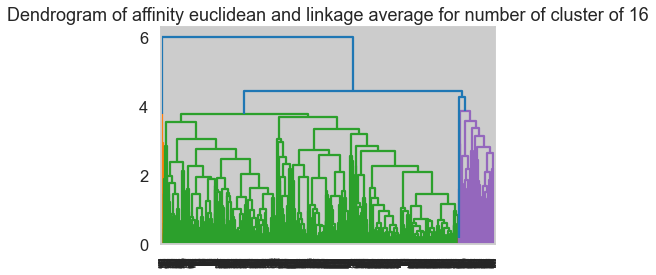

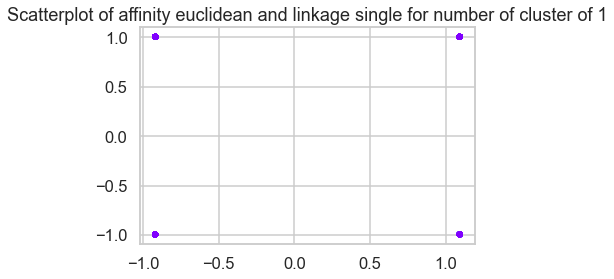

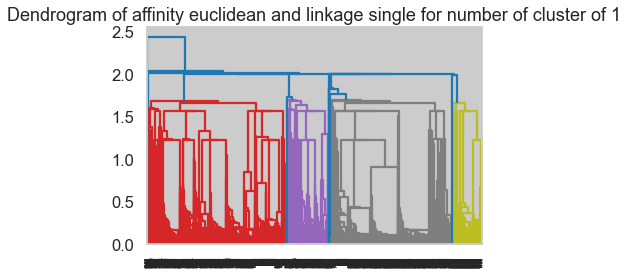

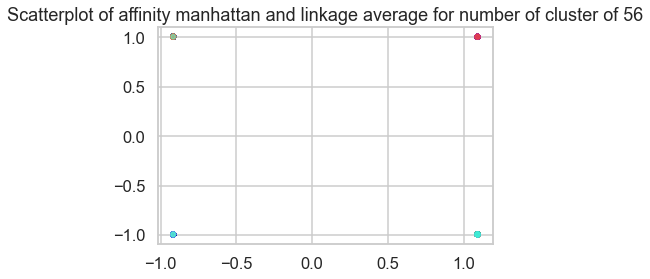

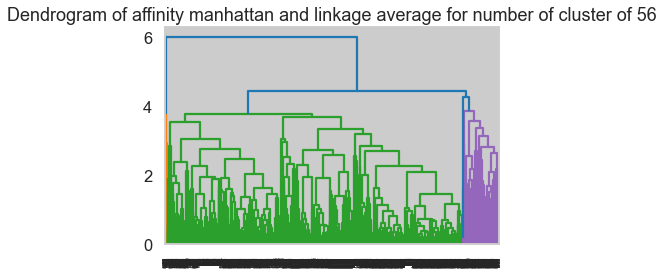

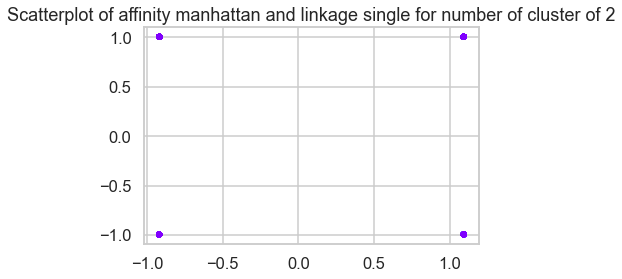

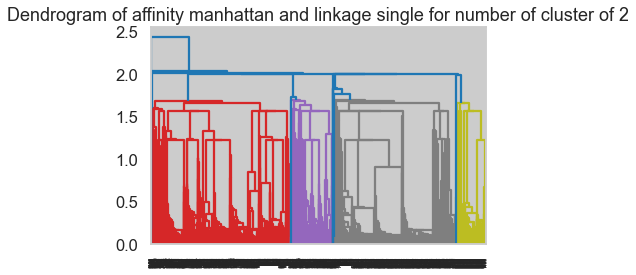

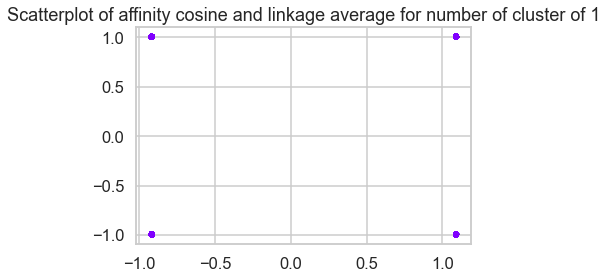

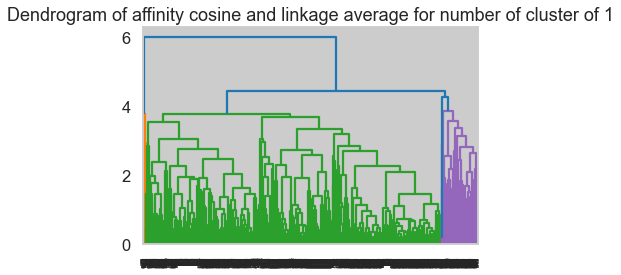

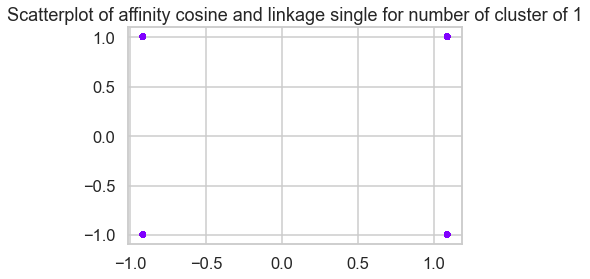

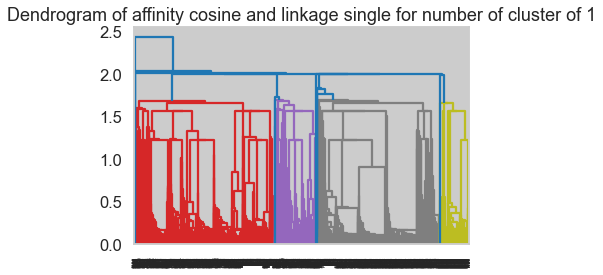

The highest silhouette score is 0.42539016886777625 for a number of cluster 56 affinity of manhattan and a linkage of average 


(0.42539016886777625, 56, 'manhattan', 'average')

In [365]:
plot_hierarchial_clusters_and_dendrograms(customer_dataset_scaled.values)

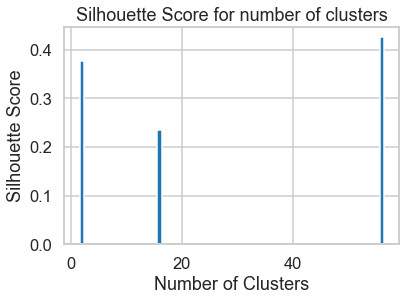

In [366]:
plot_hierarchial_silhouette(customer_dataset_scaled.values)

## Dbscan for Customer Dataset

The highest silhouette score is 0.4225606832617899 for an epsilon value of 1.2000000000000002 and min_samples of 5 


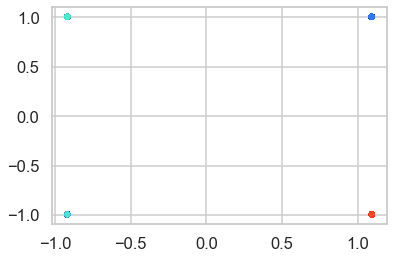

In [367]:
plot_dbscan_clusters(customer_dataset_scaled.values)

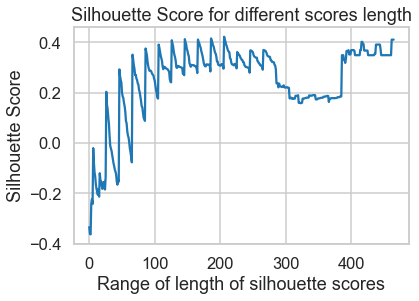

In [368]:
plot_dbscan_silhouette(customer_dataset_scaled.values)

## Gaussian for Customer Dataset

In [376]:
#Same as before we will apply this algorithm to 2 features and clearly the 2 most important ones are age and income
customer_dataset_scaled.head()
#customer_dataset_scaled.values[:,3:5]
#plot_Gaussian_contours(customer_dataset_scaled.values[:,0:2])

Sex  Marital status       Age  Education    Income  Occupation  \
0 -0.917399       -0.993024  2.653614   1.604323  0.097524    0.296823   
1  1.090038        1.007025 -1.187132  -0.063372  0.782654    0.296823   
2 -0.917399       -0.993024  1.117316  -0.063372 -0.833202   -1.269525   
3 -0.917399       -0.993024  0.775916  -0.063372  1.328386    0.296823   
4 -0.917399       -0.993024  1.458716  -0.063372  0.736932    0.296823   

   Settlement size  
0         1.552326  
1         1.552326  
2        -0.909730  
3         0.321298  
4         0.321298

In [398]:
arr_1=customer_dataset_scaled.values[:,2]
arr_2=customer_dataset_scaled.values[:,4]
arr_3=np.vstack((arr_1,arr_2))
arr_3

array([[ 2.65361447, -1.18713209,  1.11731585, ..., -0.41898277,
        -1.01643224, -0.93108232],
       [ 0.09752361,  0.78265438, -0.83320224, ..., -0.90695688,
        -0.60332923, -1.3789866 ]])